### AIM:
XYZ Pharma company/Hospital wants to build machine learning model to predict which drug type is good for the patient based on patient details.

In this project, I used following classification algorithms.

KNN Classification,
Decision Tree Classification,
Support Vector Machine,
Random Forest

And we performed :
### EDA
### Data Visualization
### Performed ML Algorithms after label encoding
### Comparison of different Models Efficiency
### Predicting the Best Drug for Patients

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import preprocessing

 ### Exploring Data

In [2]:
data = pd.read_excel('drug200.xlsx')

Shapes & Structures

In [3]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


### Features in our data

In [4]:

print("Name of Columns in the given data :-", data.columns.values)



Name of Columns in the given data :- ['Age' 'Sex' 'BP' 'Cholesterol' 'Na_to_K' 'Drug']


### EDA

In [5]:
 data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [6]:
data['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [7]:
data['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [9]:

print("\nData Information")
print('-'*65) 
print(data.info())
print(data.shape)


Data Information
-----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None
(200, 6)


### Feature Information

The drug kind is the target feature.


The feature sets consist of:

1. Age: Patient's age

2. Sex: Patient's sex and gender

3. Levels of Blood Pressure (BP)

4. Levels of Cholesterol

5. Ration of Na to Potassium

In [12]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Data cleaning is not required as no nan Values are present in the data

In [13]:
data.duplicated().value_counts()

False    200
Name: count, dtype: int64

No Duplicate datapoints are present in the dataset

In [15]:
a = ['Age', 'Na_to_K']
data[a].corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


In [16]:
data[a].cov()

,Age,Na_to_K
Age,273.714347,-7.543752
Na_to_K,-7.543752,52.185533


 ## Data Visualization 

<Axes: >

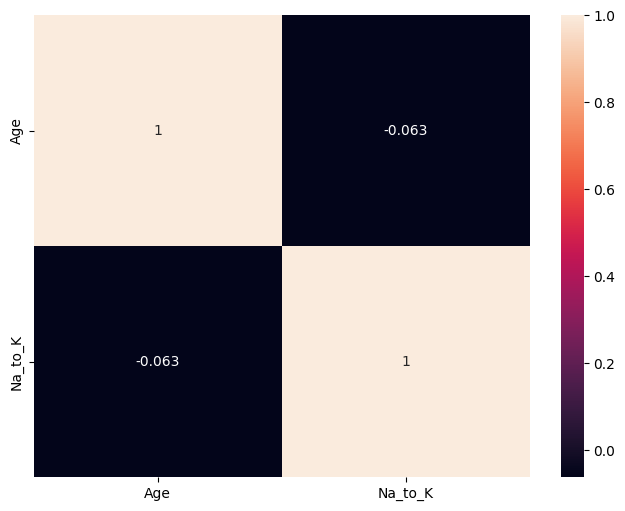

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(data[a].corr(), annot=True)



<Axes: >

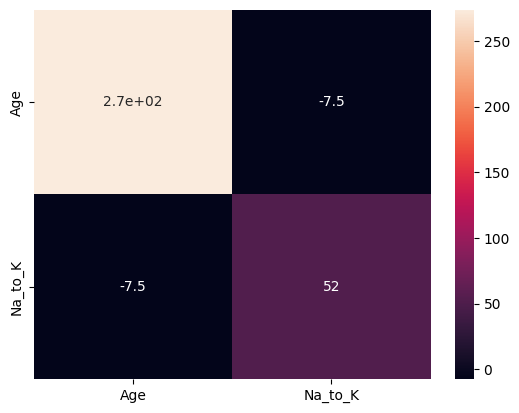

In [18]:
sns.heatmap(data[a].cov(), annot=True)

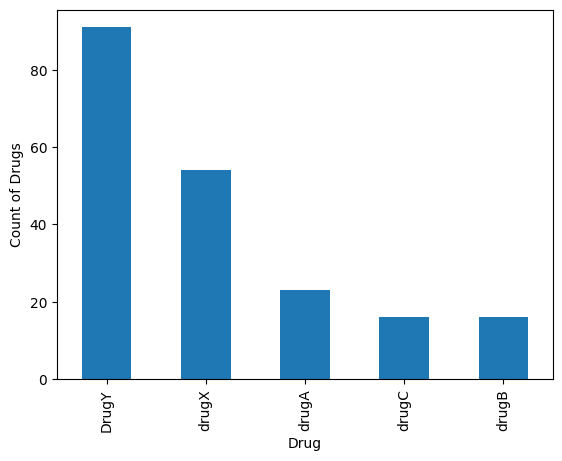

In [30]:
data.Drug.value_counts().plot(kind= 'bar')
plt.xlabel('Drug')
plt.ylabel('Count of Drugs')
plt.show()

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Handle categorical variables (if any)
le = LabelEncoder()
for column in data.select_dtypes(include='object').columns:
    data[column] = le.fit_transform(data[column])

# Separate features and target
X = data.drop(columns=['Drug'])  # Replace 'Drug' with the actual target column name
y = data['Drug']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
X_train

Training data shape: (160, 5)
Testing data shape: (40, 5)


,Age,Sex,BP,Cholesterol,Na_to_K
79,32,0,1,1,10.840
197,52,1,2,0,9.894
38,39,0,2,1,9.709
24,33,0,1,0,33.486
122,34,1,2,0,22.456
...,...,...,...,...,...
106,22,1,2,0,11.953
14,50,0,2,0,12.703
92,29,0,0,0,29.450
179,67,0,2,0,15.891


In [170]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions and evaluation
y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.7
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.60      0.50      0.55         6
           2       0.33      0.67      0.44         3
           3       1.00      0.20      0.33         5
           4       0.54      0.64      0.58        11

    accuracy                           0.70        40
   macro avg       0.69      0.60      0.58        40
weighted avg       0.76      0.70      0.69        40



In [171]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions and evaluation
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [172]:
from sklearn.svm import SVC

# SVM model
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Predictions and evaluation
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [173]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



## Models Comparison

In [174]:
results = {
    "KNN Accuracy": accuracy_score(y_test, y_pred_knn),
    "Decision Tree Accuracy": accuracy_score(y_test, y_pred_dt),
    "SVM Accuracy": accuracy_score(y_test, y_pred_svm),
    "Random Forest Accuracy": accuracy_score(y_test, y_pred_rf),
}

print("Model Performance Comparison:")
for model, accuracy in results.items():
    print(f"{model}: {accuracy:.2f}")





Model Performance Comparison:
KNN Accuracy: 0.70
Decision Tree Accuracy: 1.00
SVM Accuracy: 1.00
Random Forest Accuracy: 1.00


In [175]:
import pandas as pd
from collections import Counter

# Ensure the LabelEncoder instance is fitted
if not hasattr(le, "classes_"):
    raise ValueError("LabelEncoder is not fitted. Fit it with the target labels using le.fit(y).")

# Decode predictions to original labels
decoded_predictions = le.inverse_transform(predictions)

# Add predictions back to the test set for analysis
X_test_copy = X_test.copy()
X_test_copy['Prediction'] = decoded_predictions

# Count the frequency of each predicted drug
class_counts = Counter(decoded_predictions)
print("Drug class distribution in predictions:")
for drug, count in class_counts.items():
    print(f"{drug}: {count}")



most_efficient_drug_label = le.inverse_transform([most_efficient_drug])[0]
print(f"The most efficient drug as per the model is: {most_efficient_drug_label}")


Drug class distribution in predictions:
drugX: 11
DrugY: 15
drugC: 5
drugA: 6
drugB: 3
The most efficient drug as per the model is: DrugY
